# **INMERSIÓN DE DATOS CON PYTHON**

### **CLASE 02 - CONSTRUCCIÓN, EVALUACIÓN Y SELECCIÓN DEL MEJOR MODELO**

#**PROBLEMA DE NEGOCIO**

La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

#**1. Configuración del Ambiente**


---

In [13]:
# prompt: importa los siguientes módulos con sus respectivos alias: pandas, matplotlib, seaborn, drive de google colab, warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings

#drive.mount("/content/Drive")
warnings.filterwarnings("ignore")

#**2. Preprocesamiento de Datos**


---

In [14]:
pd.set_option('display.max_columns',None)
global df_banco, resultados

In [16]:
df_banco = pd.read_csv('/german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [17]:
df_banco.shape

(1000, 21)

In [18]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [19]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [20]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [21]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
for columna in columnas:
  print(f'El nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  print('\n')

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [22]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [23]:
procesar_datos()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
740,0,1,24,2,1,2325,4,2,2,3,1,3,3,32,1,2,1,3,1,0,1
875,0,2,11,5,1,1322,2,3,4,2,1,4,3,40,3,2,2,3,1,0,1
209,0,4,12,3,2,1413,2,2,3,3,1,2,2,55,3,2,1,3,1,0,0


#**3. Exploración de Datos**


---

In [24]:
variables_discretas = ['personal_status_sex','age',
                       'duration_in_month','credit_amount','default']
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [25]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [26]:
feature_engineering()
df_banco.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6


In [27]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


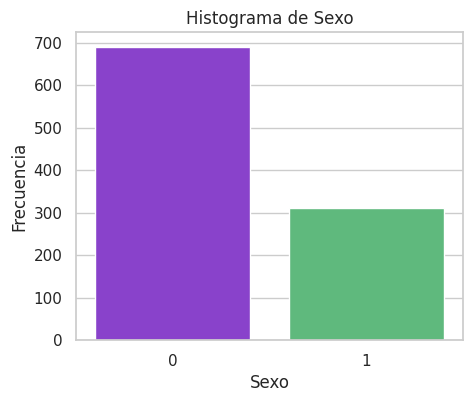

In [67]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn con colores morado y verde
plt.figure(figsize=(5, 4))

# Definir una paleta de colores morado y verde
purple_green_palette = ["#8a2be2", "#50C878"]

# Crear el histograma
sns.countplot(data=df_banco, x='sexo', palette=purple_green_palette)
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

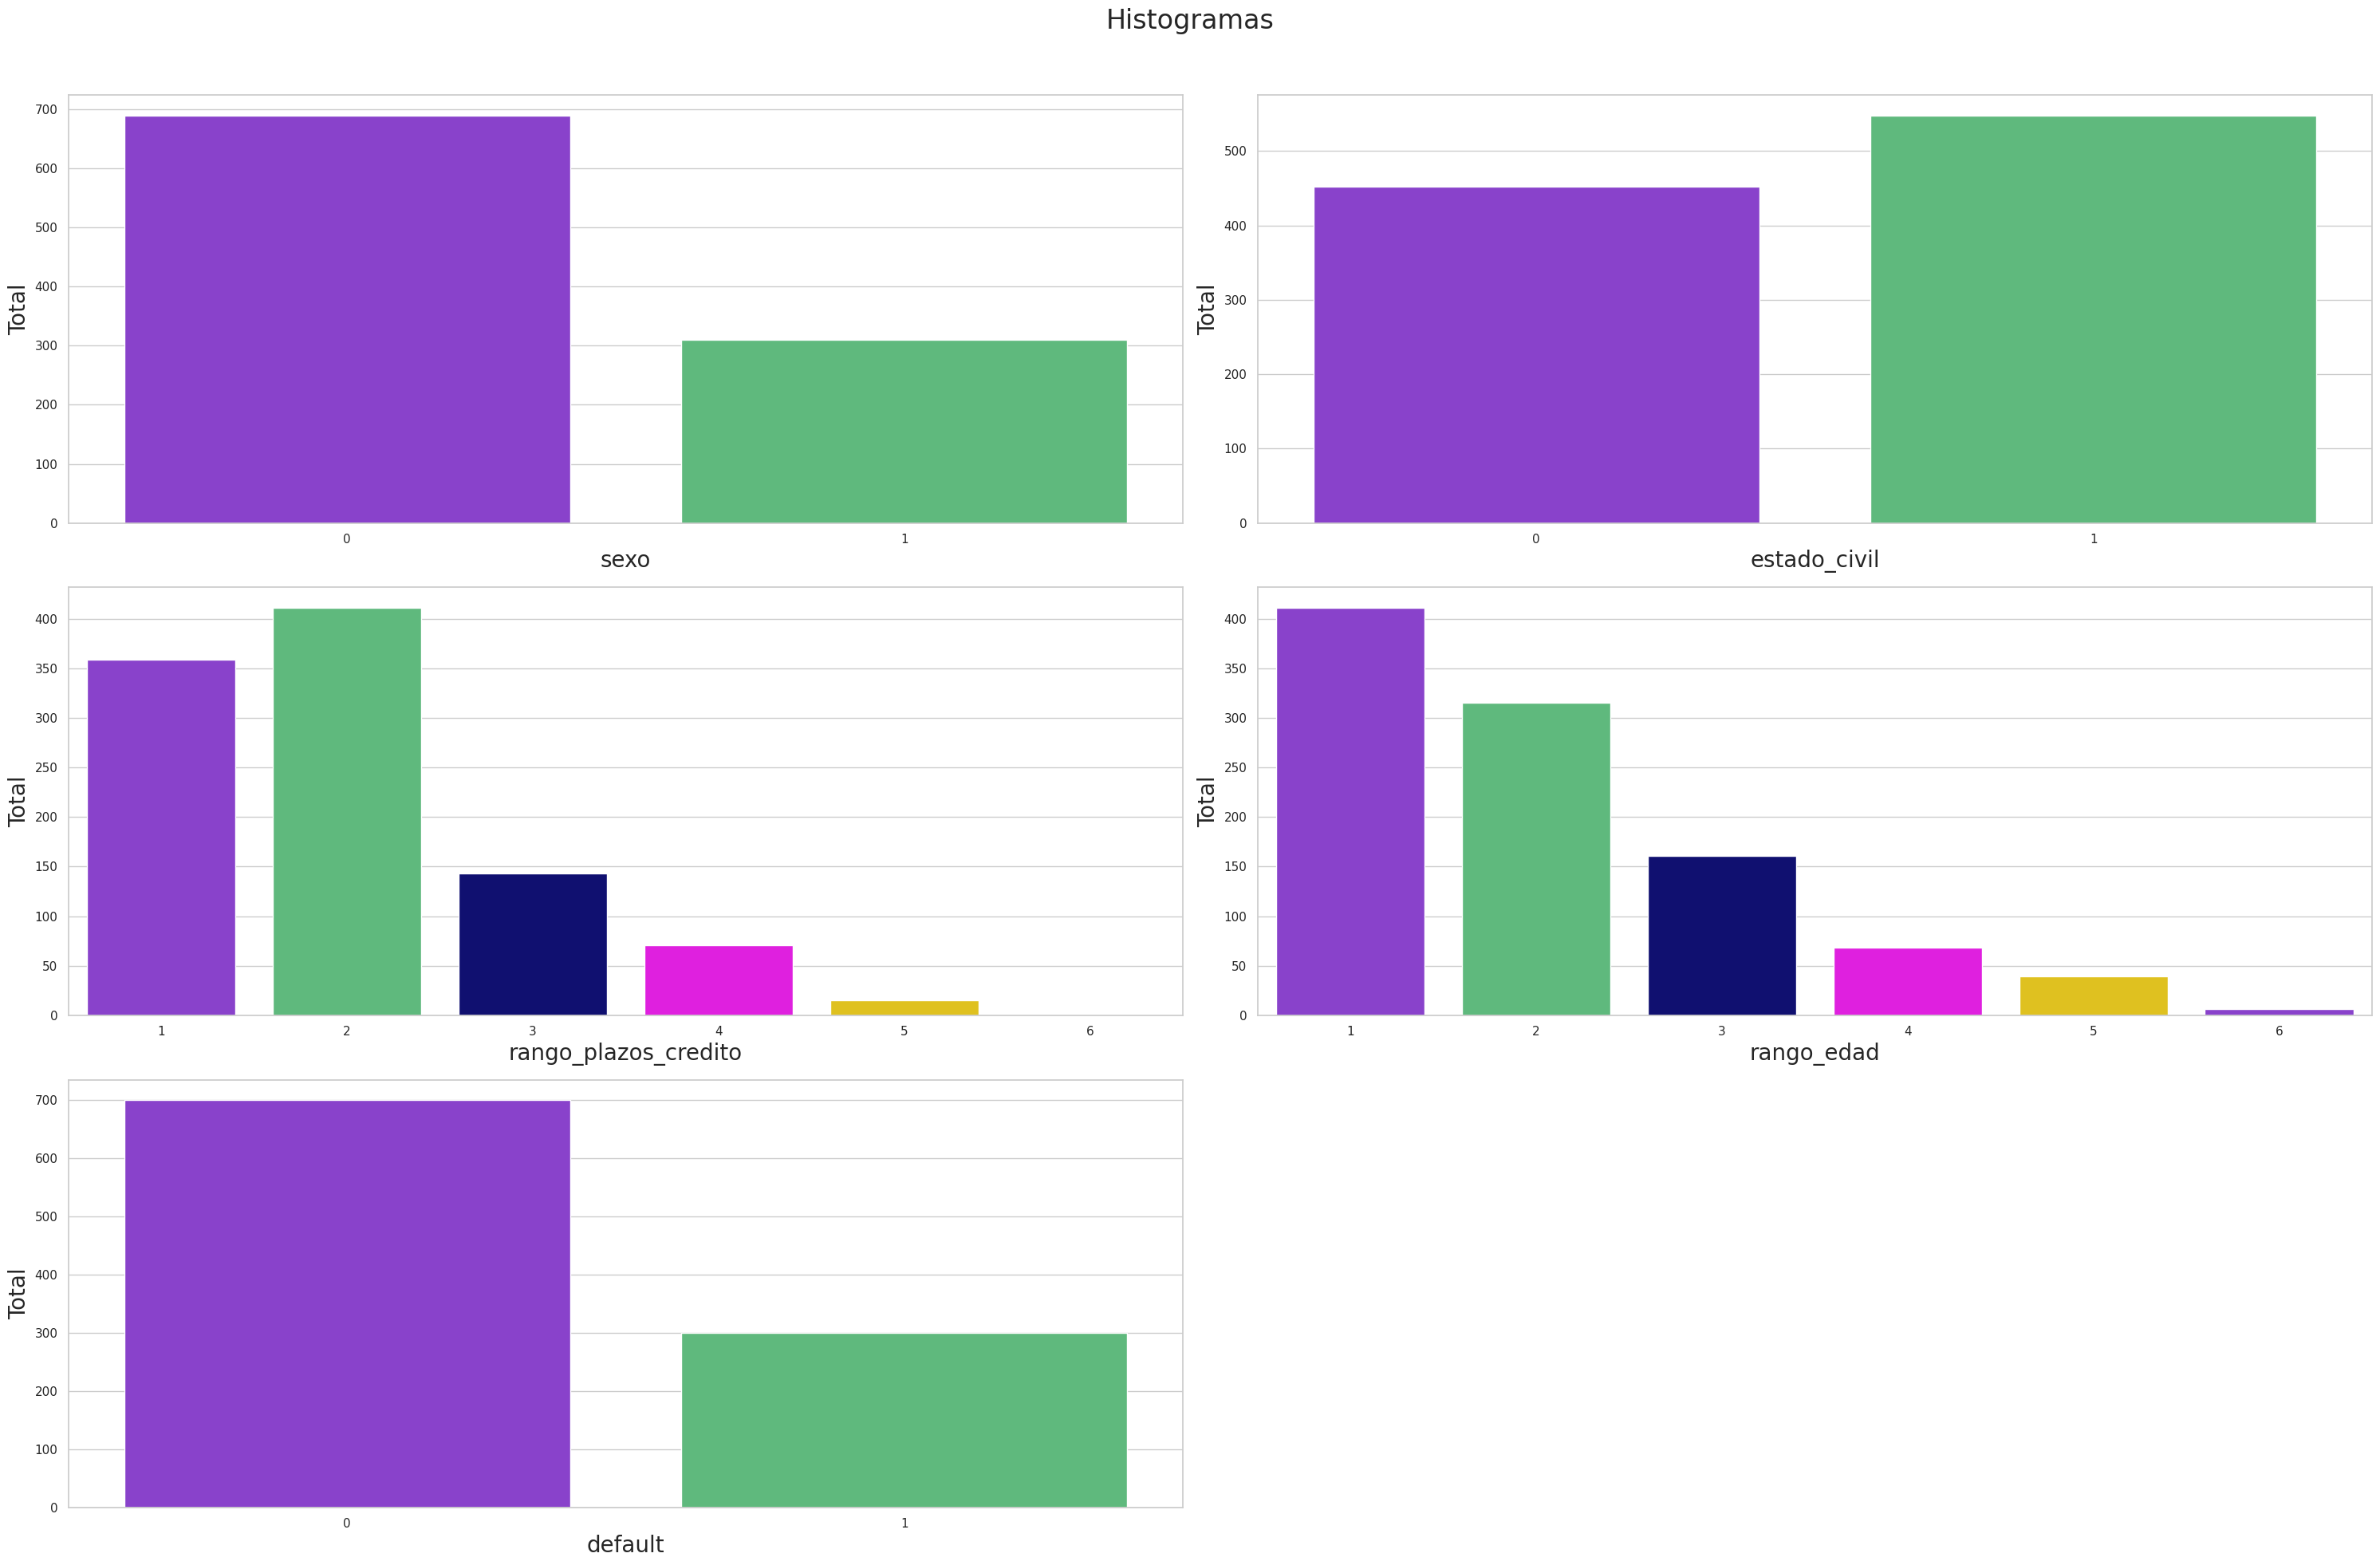

In [66]:
def analisis_exploratorio():
    global df_banco
    histogramas = ['sexo', 'estado_civil', 'rango_plazos_credito', 'rango_edad', 'default']
    lista_histogramas = list(enumerate(histogramas))
    plt.figure(figsize=(30, 20))
    plt.suptitle('Histogramas', fontsize=24)

    # Definir una paleta de colores que combinen con el morado
    custom_palette = ["#8a2be2", "#50C878", "#000080", "#FF00FF", "#FFD700"]

    for i, col in lista_histogramas:
        plt.subplot(3, 2, i + 1)
        sns.countplot(x=col, data=df_banco, palette=custom_palette)
        plt.xlabel(col, fontsize=20)
        plt.ylabel('Total', fontsize=20)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar layout para que el título no se solape con los gráficos
    plt.show()

analisis_exploratorio()

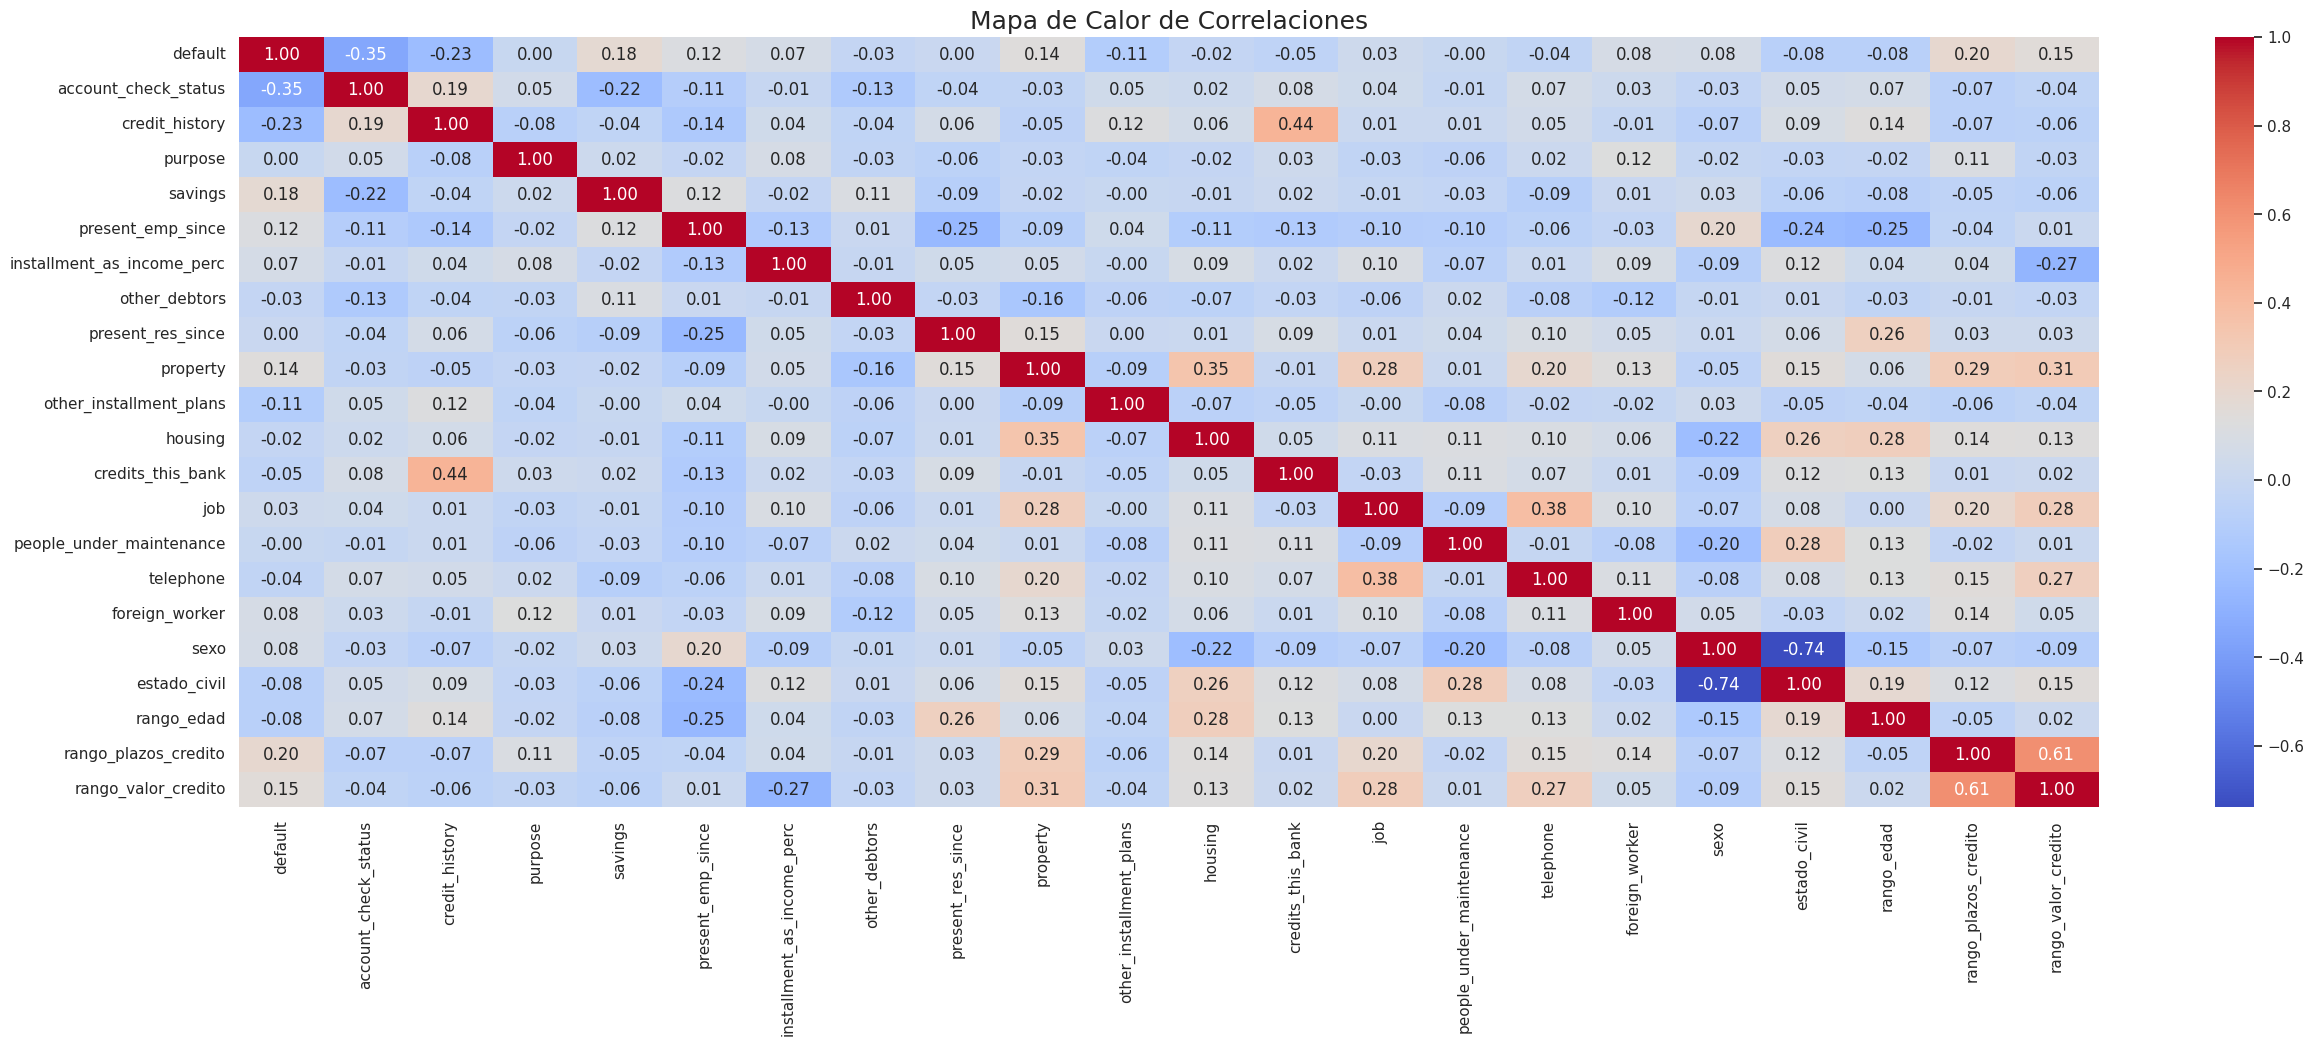

In [62]:
plt.figure(figsize=(30,10))
heatmap = sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones', fontsize=18)
plt.show()

#**4. Construcción de Modelos**


---


In [79]:
# prompt: importar las siguientes bibliotecas: train_test_split, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [81]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Escalar las características
scaler = StandardScaler()
X = df_banco.drop('default', axis=1)
X = scaler.fit_transform(X)
y = df_banco['default']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Entrenar el modelo con manejo de desequilibrio de clases
modelo = LogisticRegression(class_weight='balanced')
modelo.fit(X_train, y_train)

# 4. Evaluar el modelo
predicciones = modelo.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy}')

# Reportar métricas adicionales
print("Classification Report:\n", classification_report(y_test, predicciones))
print("Confusion Matrix:\n", confusion_matrix(y_test, predicciones))

# 5. Validación cruzada
cv_scores = cross_val_score(modelo, X, y, cv=10)
print(f'Cross-Validation Accuracy: {cv_scores.mean()}')

# 6. Guardar el modelo
joblib.dump(modelo, 'modelo_logistic_regression.pkl')


Accuracy: 0.688
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.67      0.75       178
           1       0.47      0.74      0.58        72

    accuracy                           0.69       250
   macro avg       0.67      0.70      0.66       250
weighted avg       0.75      0.69      0.70       250

Confusion Matrix:
 [[119  59]
 [ 19  53]]
Cross-Validation Accuracy: 0.716


['modelo_logistic_regression.pkl']

In [82]:
def crea_modelos():
  global df_banco, resultados
  y = df_banco['default']
  x = df_banco.drop(columns='default')
  train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

  models = {
      'Regresión Logística': LogisticRegression(),
      'Árbol de Decisión': DecisionTreeClassifier(),
      'Random Forest': RandomForestClassifier(),
      'Naive Bayes': GaussianNB()
  }

  results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

  for name, model in models.items():
      model.fit(train_x, train_y)
      predictions = model.predict(test_x)
      accuracy = accuracy_score(test_y, predictions)
      precision = precision_score(test_y, predictions)
      recall = recall_score(test_y, predictions)
      f1 = f1_score(test_y, predictions)
      if hasattr(model, "predict_proba"):
          proba = model.predict_proba(test_x)
          roc_auc = roc_auc_score(test_y, proba[:, 1])
      else:
          roc_auc = None

      results['Model'].append(name)
      results['Accuracy'].append(accuracy)
      results['Precision'].append(precision)
      results['Recall'].append(recall)
      results['F1-score'].append(f1)
      results['AUC-ROC'].append(roc_auc)

  resultados = results

In [83]:
crea_modelos()
for i,model in enumerate(resultados['Model']):
  print(model)
  print(resultados['Accuracy'][i])
  print(resultados['Precision'][i])
  print(resultados['Recall'][i])
  print(resultados['F1-score'][i])
  print(resultados['AUC-ROC'][i])
  print('\n')

Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.6966666666666667
0.4675324675324675
0.4186046511627907
0.44171779141104295
0.6135079330580309


Random Forest
0.7833333333333333
0.7333333333333333
0.38372093023255816
0.5038167938931298
0.7843403607911323


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




#**5. Evaluación y Selección del Modelo**


---

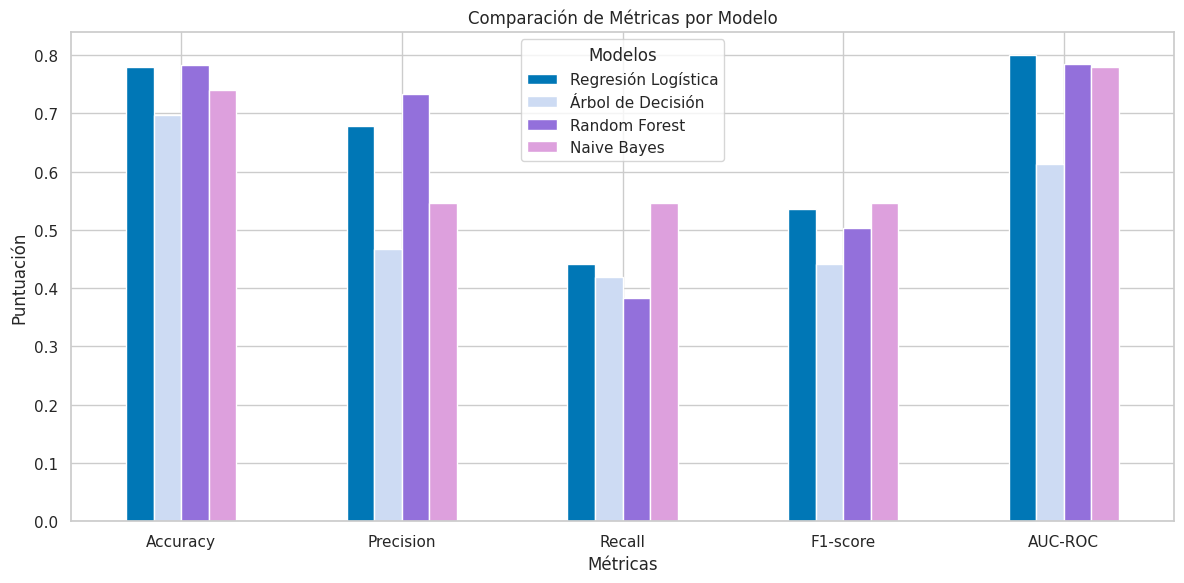

In [95]:
visualiza_resultados()

Para seleccionar el mejor modelo de clasificación basado en las métricas proporcionadas, es importante considerar varias métricas de evaluación y no solo la precisión. Aquí están las métricas clave para cada modelo:

### Resumen de Métricas por Modelo

1. **Regresión Logística**
   - Accuracy: 0.78
   - Precision: 0.6786
   - Recall: 0.4419
   - F1-score: 0.5352
   - AUC-ROC: 0.7999

2. **Árbol de Decisión**
   - Accuracy: 0.6967
   - Precision: 0.4675
   - Recall: 0.4186
   - F1-score: 0.4417
   - AUC-ROC: 0.6135

3. **Random Forest**
   - Accuracy: 0.7833
   - Precision: 0.7333
   - Recall: 0.3837
   - F1-score: 0.5038
   - AUC-ROC: 0.7843

4. **Naive Bayes**
   - Accuracy: 0.74
   - Precision: 0.5465
   - Recall: 0.5465
   - F1-score: 0.5465
   - AUC-ROC: 0.7800

### Análisis de las Métricas

- **Accuracy**: Random Forest y Regresión Logística tienen las precisiones más altas.
- **Precision**: Random Forest y Regresión Logística también tienen las precisiones más altas.
- **Recall**: Regresión Logística y Naive Bayes tienen los mejores valores de recall, lo cual es importante si queremos minimizar los falsos negativos.
- **F1-score**: Naive Bayes tiene el mejor F1-score, lo cual es una medida equilibrada entre precisión y recall.
- **AUC-ROC**: La Regresión Logística tiene el mejor AUC-ROC, lo que indica una mejor capacidad del modelo para diferenciar entre las clases positivas y negativas.

### Conclusión

Aunque el **Random Forest** tiene una precisión alta, su recall es bajo, lo que significa que no detecta bien las clases positivas. El **Naive Bayes** tiene un buen equilibrio entre precisión, recall y F1-score, pero su AUC-ROC es un poco más bajo que el de la **Regresión Logística**. La **Regresión Logística** tiene la mejor puntuación AUC-ROC y una precisión razonable, pero su recall es más bajo comparado con Naive Bayes.

**Seleccionaría la Regresión Logística** debido a su alto AUC-ROC, lo que indica una buena capacidad para discriminar entre clases, y su balance razonable entre precisión y recall. Además, la Regresión Logística es más interpretable, lo cual puede ser una ventaja para explicar el modelo a stakeholders no técnicos.

### Recomendaciones Adicionales

1. **Ajustar Hiperparámetros**: Se podría mejorar el modelo ajustando hiperparámetros usando técnicas como Grid Search o Random Search.
2. **Ensemble Methods**: Considerar combinar múltiples modelos para aprovechar las fortalezas de cada uno.
3. **Feature Engineering**: Realizar un análisis más profundo de las características para mejorar el rendimiento del modelo.

Estas mejoras podrían proporcionar un rendimiento aún mejor y ofrecer una solución más robusta.

# **Ajuste de Hiperparámetros con Grid Search**
## **Regresión Logística**

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el modelo
log_reg = LogisticRegression(class_weight='balanced', max_iter=10000)

# Definir los hiperparámetros para Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularización
    'solver': ['liblinear', 'saga']  # Algoritmos de optimización
}

# Configurar Grid Search
grid_search_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='roc_auc')
grid_search_log_reg.fit(X_train, y_train)

# Resultados
print(f"Mejores hiperparámetros para Regresión Logística: {grid_search_log_reg.best_params_}")
print(f"Mejor AUC-ROC para Regresión Logística: {grid_search_log_reg.best_score_}")

# Entrenar el mejor modelo en todo el conjunto de entrenamiento
best_log_reg = grid_search_log_reg.best_estimator_
best_log_reg.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
predicciones = best_log_reg.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(y_test, predicciones))
print("Confusion Matrix:\n", confusion_matrix(y_test, predicciones))

Mejores hiperparámetros para Regresión Logística: {'C': 0.01, 'solver': 'saga'}
Mejor AUC-ROC para Regresión Logística: 0.7779704659269877
Accuracy: 0.708
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.70      0.77       178
           1       0.50      0.74      0.59        72

    accuracy                           0.71       250
   macro avg       0.68      0.72      0.68       250
weighted avg       0.76      0.71      0.72       250

Confusion Matrix:
 [[124  54]
 [ 19  53]]


## **Random Forest**

In [87]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo
random_forest = RandomForestClassifier(class_weight='balanced', random_state=42)

# Definir los hiperparámetros para Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en un nodo hoja
}

# Configurar Grid Search
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)

# Resultados
print(f"Mejores hiperparámetros para Random Forest: {grid_search_rf.best_params_}")
print(f"Mejor AUC-ROC para Random Forest: {grid_search_rf.best_score_}")

# Entrenar el mejor modelo en todo el conjunto de entrenamiento
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
predicciones = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(y_test, predicciones))
print("Confusion Matrix:\n", confusion_matrix(y_test, predicciones))


Mejores hiperparámetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Mejor AUC-ROC para Random Forest: 0.7884146626320538
Accuracy: 0.764
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       178
           1       0.58      0.62      0.60        72

    accuracy                           0.76       250
   macro avg       0.71      0.72      0.72       250
weighted avg       0.77      0.76      0.77       250

Confusion Matrix:
 [[146  32]
 [ 27  45]]


# **Ensemble Methods (Métodos de Ensamble)**
También se puede combinar múltiples modelos para aprovechar las fortalezas de cada uno usando VotingClassifier.

In [88]:
from sklearn.ensemble import VotingClassifier

# Definir los modelos base
modelos = [
    ('log_reg', best_log_reg),
    ('random_forest', best_rf)
]

# Configurar el Voting Classifier
voting_clf = VotingClassifier(estimators=modelos, voting='soft')
voting_clf.fit(X_train, y_train)

# Evaluar el modelo de ensamble en el conjunto de prueba
predicciones = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(y_test, predicciones))
print("Confusion Matrix:\n", confusion_matrix(y_test, predicciones))

Accuracy: 0.756
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       178
           1       0.56      0.67      0.61        72

    accuracy                           0.76       250
   macro avg       0.71      0.73      0.72       250
weighted avg       0.77      0.76      0.76       250

Confusion Matrix:
 [[141  37]
 [ 24  48]]


# **Desafíos:**

1. Evaluar la Matrix de Confusión
2. Balancear la variable target
3. Seleccionar sólo algunas variable y reevaluar

1. Evaluar la Matriz de Confusión

Ya hemos calculado y mostrado la matriz de confusión, pero aquí se presenta el código para recordarlo:

In [91]:
from sklearn.metrics import confusion_matrix

# Predecir con el modelo entrenado
predicciones = modelo.predict(X_test)

# Evaluar la matriz de confusión
cm = confusion_matrix(y_test, predicciones)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[119  59]
 [ 19  53]]


2. Balancear la Variable Target

Para balancear la variable target, podemos utilizar técnicas como sobremuestreo (oversampling) con SMOTE (Synthetic Minority Over-sampling Technique) o submuestreo (undersampling).

Aquí usamos SMOTE como ejemplo:

In [92]:
from imblearn.over_sampling import SMOTE

# Balancear la variable target usando SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Entrenar el modelo con los datos balanceados
modelo_balanced = LogisticRegression(class_weight='balanced')
modelo_balanced.fit(X_res, y_res)

# Evaluar el modelo balanceado
predicciones_balanced = modelo_balanced.predict(X_test)
accuracy_balanced = accuracy_score(y_test, predicciones_balanced)
print(f'Balanced Accuracy: {accuracy_balanced}')
print("Balanced Classification Report:\n", classification_report(y_test, predicciones_balanced))
print("Balanced Confusion Matrix:\n", confusion_matrix(y_test, predicciones_balanced))


Balanced Accuracy: 0.716
Balanced Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       178
           1       0.50      0.76      0.61        72

    accuracy                           0.72       250
   macro avg       0.69      0.73      0.69       250
weighted avg       0.77      0.72      0.73       250

Balanced Confusion Matrix:
 [[124  54]
 [ 17  55]]


3. Seleccionar Solo Algunas Variables y Reevaluar

Para seleccionar las variables más importantes, podemos utilizar métodos como SelectKBest de sklearn.feature_selection o un análisis de importancia de características basado en un modelo de árboles. Aquí se muestra un ejemplo utilizando SelectKBest:

In [93]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las 10 mejores características
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba con las nuevas características
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.25, random_state=42)

# Entrenar el modelo con las nuevas características
modelo_new = LogisticRegression(class_weight='balanced')
modelo_new.fit(X_train_new, y_train_new)

# Evaluar el modelo con las nuevas características
predicciones_new = modelo_new.predict(X_test_new)
accuracy_new = accuracy_score(y_test_new, predicciones_new)
print(f'New Features Accuracy: {accuracy_new}')
print("New Features Classification Report:\n", classification_report(y_test_new, predicciones_new))
print("New Features Confusion Matrix:\n", confusion_matrix(y_test_new, predicciones_new))

New Features Accuracy: 0.72
New Features Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.71      0.78       178
           1       0.51      0.75      0.61        72

    accuracy                           0.72       250
   macro avg       0.69      0.73      0.69       250
weighted avg       0.77      0.72      0.73       250

New Features Confusion Matrix:
 [[126  52]
 [ 18  54]]


## **Código Completo con Todos los Pasos**

Original Confusion Matrix:
 [[119  59]
 [ 19  53]]
Balanced Accuracy: 0.716
Balanced Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       178
           1       0.50      0.76      0.61        72

    accuracy                           0.72       250
   macro avg       0.69      0.73      0.69       250
weighted avg       0.77      0.72      0.73       250

Balanced Confusion Matrix:
 [[124  54]
 [ 17  55]]
New Features Accuracy: 0.72
New Features Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.71      0.78       178
           1       0.51      0.75      0.61        72

    accuracy                           0.72       250
   macro avg       0.69      0.73      0.69       250
weighted avg       0.77      0.72      0.73       250

New Features Confusion Matrix:
 [[126  52]
 [ 18  54]]


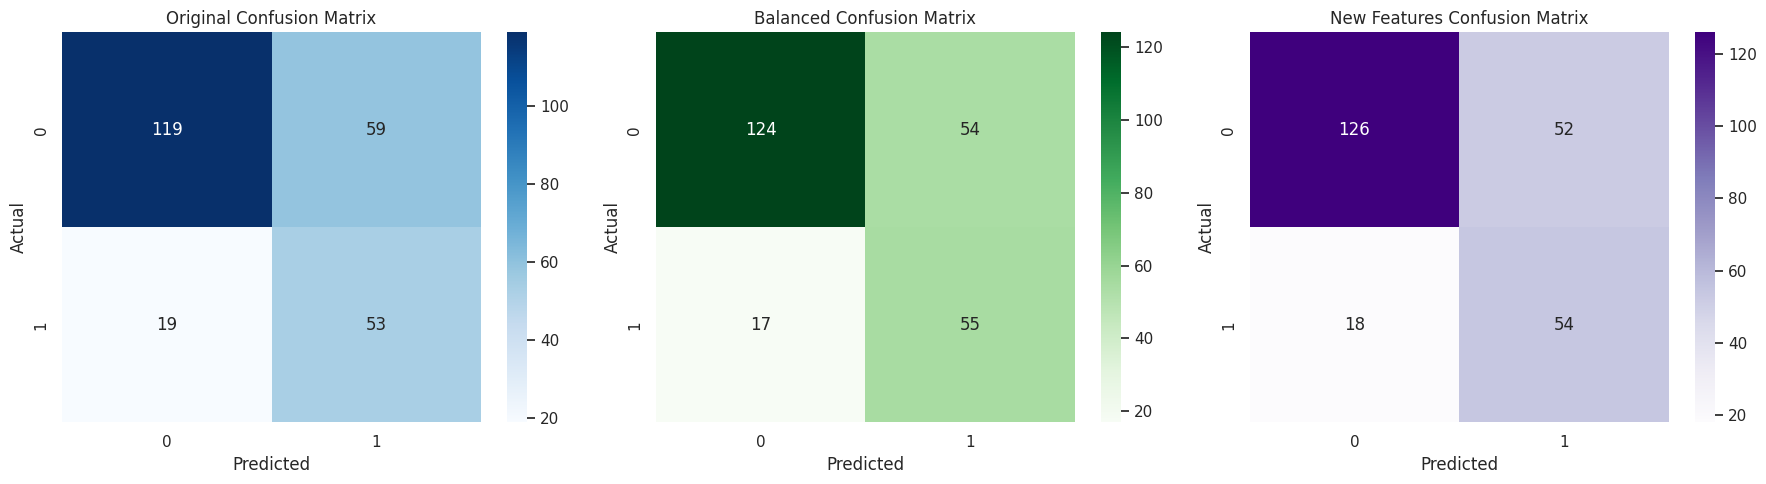

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
import joblib

# Escalar las características
scaler = StandardScaler()
X = df_banco.drop('default', axis=1)
X = scaler.fit_transform(X)
y = df_banco['default']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Evaluar la matriz de confusión original
modelo = LogisticRegression(class_weight='balanced')
modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)
cm_original = confusion_matrix(y_test, predicciones)
print("Original Confusion Matrix:\n", cm_original)

# 4. Balancear la variable target usando SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Entrenar el modelo con los datos balanceados
modelo_balanced = LogisticRegression(class_weight='balanced')
modelo_balanced.fit(X_res, y_res)

# Evaluar el modelo balanceado
predicciones_balanced = modelo_balanced.predict(X_test)
accuracy_balanced = accuracy_score(y_test, predicciones_balanced)
cm_balanced = confusion_matrix(y_test, predicciones_balanced)
print(f'Balanced Accuracy: {accuracy_balanced}')
print("Balanced Classification Report:\n", classification_report(y_test, predicciones_balanced))
print("Balanced Confusion Matrix:\n", cm_balanced)

# 5. Seleccionar las mejores características y reevaluar
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.25, random_state=42)

# Entrenar el modelo con las nuevas características
modelo_new = LogisticRegression(class_weight='balanced')
modelo_new.fit(X_train_new, y_train_new)

# Evaluar el modelo con las nuevas características
predicciones_new = modelo_new.predict(X_test_new)
accuracy_new = accuracy_score(y_test_new, predicciones_new)
cm_new = confusion_matrix(y_test_new, predicciones_new)
print(f'New Features Accuracy: {accuracy_new}')
print("New Features Classification Report:\n", classification_report(y_test_new, predicciones_new))
print("New Features Confusion Matrix:\n", cm_new)

# 6. Guardar el modelo final
joblib.dump(modelo_new, 'modelo_logistic_regression_final.pkl')

# Visualización de las matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Original Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Balanced Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(cm_new, annot=True, fmt='d', cmap='Purples', ax=axes[2])
axes[2].set_title('New Features Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


### Explicación

1. **Importaciones**: Se agregan `matplotlib.pyplot` y `seaborn` para la visualización.
2. **Evaluar y mostrar la matriz de confusión original**: Calcula y guarda la matriz de confusión original.
3. **Balancear la variable target y evaluar**: Usa SMOTE para balancear y calcula la matriz de confusión del modelo balanceado.
4. **Seleccionar características y evaluar**: Usa `SelectKBest` para seleccionar las mejores características y calcula la matriz de confusión del modelo con las nuevas características.
5. **Guardar el modelo**: Guarda el modelo final usando `joblib`.
6. **Visualización**: Crea una figura con tres subplots, cada uno mostrando una matriz de confusión diferente usando `seaborn.heatmap`.

Este código completo no solo realiza todas las tareas necesarias, sino que también proporciona una visualización clara de las matrices de confusión para cada etapa del proceso de modelado.